This script will expalin all teh EDA processess to be done

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv(r"C:\Users\kavir\OneDrive\Desktop\new\datsets\enriched_kroger_usda_products.csv")

print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kroger_product  1523 non-null   object 
 1   description     1523 non-null   object 
 2   calories        1419 non-null   float64
 3   protein         1487 non-null   float64
 4   fat             1489 non-null   float64
 5   carbohydrates   1488 non-null   float64
dtypes: float64(4), object(2)
memory usage: 71.5+ KB
None
                                      kroger_product  \
0  horizon organic shelf-stable 1% low fat milk b...   
1                  kroger® 2% reduced fat milk quart   
2            horizon organic shelf stable whole milk   
3             kroger® fat free skim milk half gallon   
4           kroger® vitamin d whole milk half gallon   

                                     description  calories  protein    fat  \
0                  Strawberry milk, low fat (1%)      69.0   

MISSING VALUES


In [ ]:
missing_data = data.isnull().sum()
print("\nMissing Values:\n", missing_data[missing_data > 0])

numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns


data = data.dropna(subset=numeric_columns)  
for col in numeric_columns:
    data = data[data[col] != 0]  

invalid_entries = ["Unknown", "", "N/A"]
for col in non_numeric_columns:
    data = data[~data[col].isin(invalid_entries)] 

data.info()

print("\nRemaining Missing Values:\n", data.isnull().sum())

#Since macronutrient values play a very important role. it is better to delete the rows with imprper data rather than just placing 0 or median or average values


Missing Values:
 calories         104
protein           36
fat               34
carbohydrates     35
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1522
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kroger_product  1192 non-null   object 
 1   description     1192 non-null   object 
 2   calories        1192 non-null   float64
 3   protein         1192 non-null   float64
 4   fat             1192 non-null   float64
 5   carbohydrates   1192 non-null   float64
dtypes: float64(4), object(2)
memory usage: 65.2+ KB

Remaining Missing Values:
 kroger_product    0
description       0
calories          0
protein           0
fat               0
carbohydrates     0
dtype: int64


Duplicate values

In [15]:
duplicate_rows = data[data.duplicated()]
print(f"\nNumber of Duplicate Rows: {duplicate_rows.shape[0]}")

data.drop_duplicates(inplace=True)
print("\nDuplicates removed. Current dataset shape:", data.shape)


Number of Duplicate Rows: 5

Duplicates removed. Current dataset shape: (1187, 6)


Hnadle Outliers

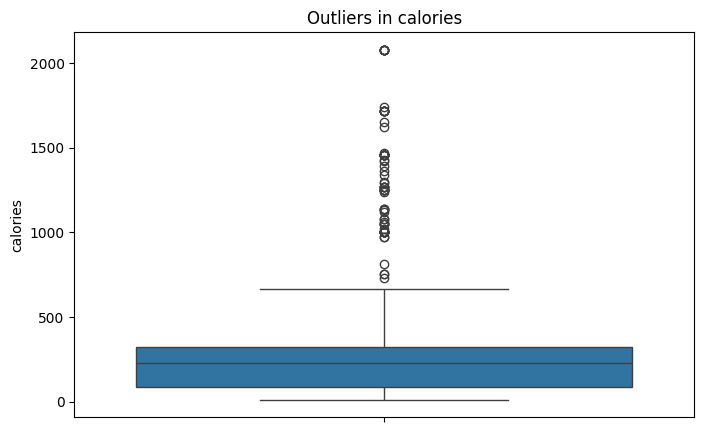

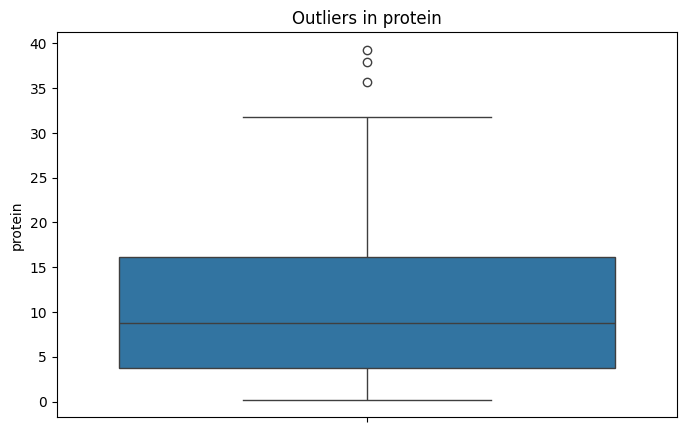

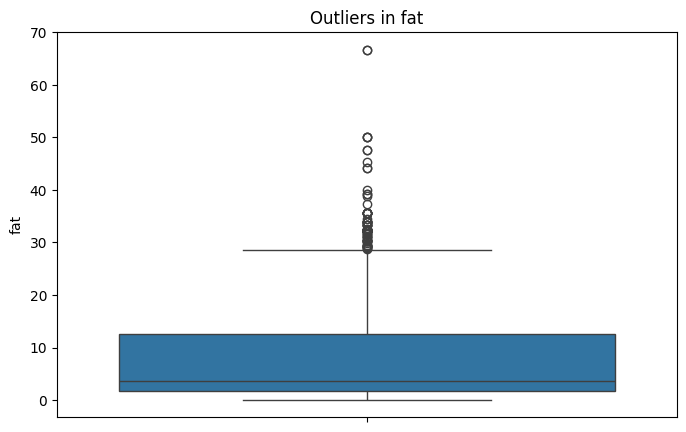

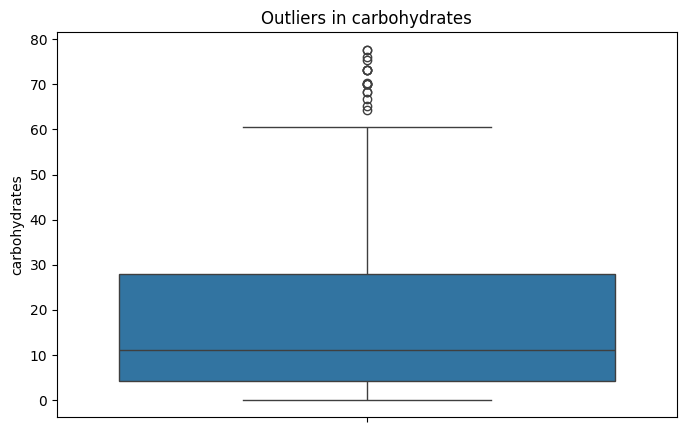

In [16]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

numerical_columns = data.select_dtypes(include=np.number).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col])
    plt.title(f'Outliers in {col}')
    plt.show()

    outliers = detect_outliers_iqr(data[col])
    data.loc[outliers, col] = data[col].clip(lower=data[col].quantile(0.05), upper=data[col].quantile(0.95))


Checking wrong or inconsistent data

In [17]:
import numpy as np

nutrient_columns = ['calories', 'protein', 'fat', 'carbohydrates']

for col in nutrient_columns:
    if (data[col] < 0).any():
        print(f"Negative values found in {col}. Replacing with NaN.")
        data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)

categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())

data['description'] = data['description'].str.strip().str.lower()



Unique values in kroger_product:
kroger_product
tyson® fully cooked southern style chicken breast tenderloins          1
horizon organic shelf-stable 1% low fat milk box - strawberry          1
kroger® 2% reduced fat milk quart                                      1
just bare® lightly breaded frozen fully cooked chicken breast bites    1
tyson frozen chicken nuggets                                           1
                                                                      ..
organic valley® family first™ whole milk with dha & omega 3            1
organic valley® whole milk half gallon                                 1
simple truth organic® 100% grassfed whole milk half gallon             1
simple truth organic® 2% reduced fat milk gallon                       1
kroger® vitamin d whole milk half gallon                               1
Name: count, Length: 1187, dtype: int64

Unique values in description:
description
Coconut milk                                            16
Milk, 

In [18]:
data = data.drop_duplicates(subset=['description'], keep='first')

data = data[data['description'].str.lower() != 'error']

print(f"Shape of data after cleaning: {data.shape}")
print(data['description'].value_counts())

Shape of data after cleaning: (719, 6)
description
southern style chicken breast tenderloins, southern style    1
strawberry milk, low fat (1%)                                1
milk, reduced fat (2%)                                       1
milk, fat free (skim)                                        1
milk, dry, whole, with added vitamin d                       1
                                                            ..
cream, half and half, lowfat                                 1
organic grassfed vitamin d milk                              1
kroger, 1% lowfat milk                                       1
whole lactose free ultra-filtered milk                       1
simple truth, organic spaghetti                              1
Name: count, Length: 719, dtype: int64


In [19]:
# Counting rows where any macronutrient value (calories, protein, fat, carbohydrates) is 0
zero_value_count = data[(data['calories'] == 0) |
                              (data['protein'] == 0) |
                              (data['fat'] == 0) |
                              (data['carbohydrates'] == 0)].shape[0]

zero_value_count


0

Saving the cleaned dataset

In [22]:
cleaned_file_path = r'C:\Users\kavir\OneDrive\Desktop\new\datsets\cleaned_dataset.csv' 
data.to_csv(cleaned_file_path, index=False)

The final cleaned dataset has been stored successfully.